
# Przygotowanie

Przygotowanie
Przed rozpoczęciem pracy z notatnikiem proszę zmienić jego nazwę dodając na początku numer albumu, imię i nazwisko. {nr_albumu}_{imię}_{nazwisko}_{nazwa}

Po wykonaniu wszystkich zadań proszę przesłać wypełniony notatnik przez platformę ELF za pomocą formularza "Prześlij projekt" w odpowiedniej sekcji.

# Support Vector Machine

Jest to jeden z najbardziej rozpowszechnionych i wszechstronnych modeli uczenia maszynowego. Z jego uzyciem dokonac mozna klasyfikacji liniowej (SVC), nieliniowej jak i regresji (SVR). Na poniższej grafice przedstawione zostało działanie klasyfikatora.

![svc](svc.png)

Analizujac grafike dostrzec mozna dwie oddzielne klasy oddzielone za pomoca prostej. Widoczna linia ciagła rozdziela klasy, a przerywane linie oznaczają margines, czyli możliwe najdalsze oddalenie elementu (np. nowego) jaki zakwalifikowany
zostanie do danej klasy. Maszyny SVM czułe sa na skale danych, przed ich uzyciem zawsze powinna zostać przeprowadzona normalizacja danych (np. min-max, lub standaryzacja).

![svc_example](svc2.jpg)

Równowage pomiedzy marginesami możemy regulować za pomoca hipermarapetru
C. Mniejsze jego wartości poszerzają granice, jednocześnie wprowadzając
więcej jej naruszeń. Im margines jest szerszy, tym własciwosci generalizujace
jakie posiada klasyfikator będę większe. Mniejsza staje się podatność na przeuczenie
(ang. overfitting), ale zmniejsza się skuteczność klasyfikatora. Szukany jest
taki klasyfikator, który podzieli przestrzeń na dwa rozłaczne zbiory odpowiadajace
dwóm klasom, w możliwie optymalny sposób. Podejście opiera się na
znalezieniu granicy decyzyjnej.

Wektory nośne (Support vectors) są to obserwacje (data points), które wystepują najbliżej hiperpłaszczyzny. Punkty te, pomagają lepiej wyznaczyć linię separacji pomiędzy klasami poprzez obliczenie marginesów. Są to najbardziej znaczace obserwacje ze zbioru z punktu widzenia konstrukcji klasyfikatora.

Warto zaznaczyć, że za pomocą klasyfikatora SVC można klasyfikaować dane, które nie są linowo separowalne. Można to osiągnąć przez tzw "sztuczkę kernelową", dzięki czemu możliwe jest zmapowanie obserwacji do wielowymiarowej przestrzeni. Klasyfikator z biblioteki Sklearn posiada parametr *kernel*, który pozwala na zmianę jądra. Dodatkowo, parametr *gamma* pozwala na modyfikację działania samego kernela.

Warto zaznaczyć, że SVC dobrze nadaje się do niewielkich zbiorów danych, gdyż w przypadku dużej ilości staję się on mało wydajny.

Funkcja jaka jest minimalizowana podczas działania klasyfikatora wygląda następująco:

\begin{equation}
min C \sum^m_{i=1}[y^{(i)}cost_{1}(\theta^{T}x^{(i)}) - (1 - y^{(i)})cost_{0}(\theta^{T}x^{(i)})] + \frac{1}{2} \sum^{n}_{i=1}\theta^{2}_{j}
\end{equation}

## Zadanie 0 

Wczytanie danych ze zbioru oraz wizualizacja.

In [5]:
import pandas as pd

data_input = pd.read_csv('datasets/Ankieta.csv')
data_input.head()
print(type(data_input))

<class 'pandas.core.frame.DataFrame'>


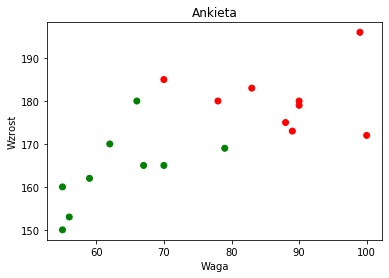

In [6]:
import matplotlib.pyplot as plt
from matplotlib import colors

x = data_input['Plec'].map(lambda x: 1 if x == 'Kobieta' else 0)
y = data_input['Waga']
z = data_input['Wzrost']

data_input['Plec'] = data_input['Plec'].map(lambda x: 1 if x == 'Kobieta' else 0)

plt.scatter(y, z, c=x, cmap=colors.ListedColormap(['red', 'green']))
plt.xlabel('Waga')
plt.ylabel('Wzrost')
plt.title('Ankieta')
plt.show()

<class 'pandas.core.frame.DataFrame'>


C:\Users\haga\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D8C14E9EC8>,
      dtype=object)

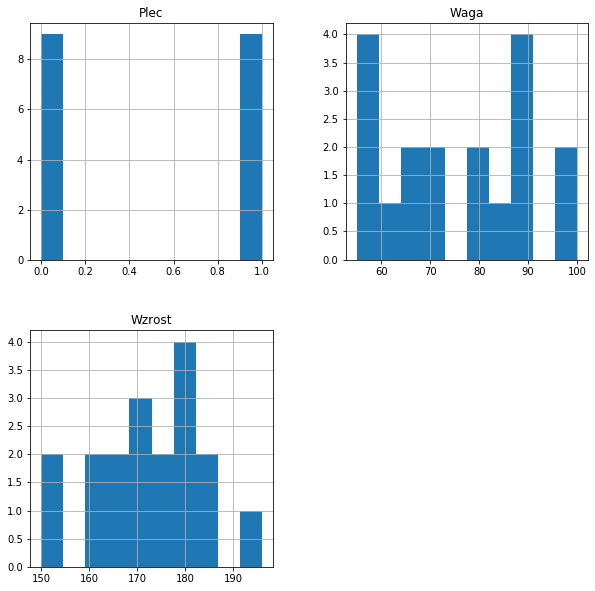

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
print(type(data_input))
data_input.hist(ax=ax)

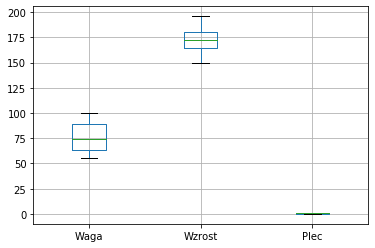

In [8]:
data_input.boxplot()

Na bazie wykresów box-plot można stwierdzić, że dane posiadają różniące się zakresy, co powoduje potrzebę ich skalowania. Warto zauważyć również, że rozkład klas w zbiorze jest równomierny (patrz: histogram)

## Zadanie 1

Proszę dokonać normalizacji zbioru danych za pomocą standaryzacji oraz narysować wykres box-plot dla wszystkich zmiennych. W jaki sposób zmieniły się dane?

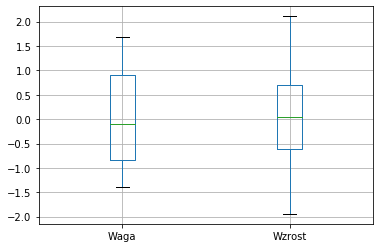

In [106]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = scaler.fit_transform(data_input[['Waga','Wzrost']])
scaled_X_df = pd.DataFrame(scaled_X, index=data_input.index, columns=['Waga','Wzrost'])
scaled_X_df.boxplot()

Po wykonaniu standaryzacji dane dotyczące wagi z zakresu ok. [50,100] zostały przeskalowane do zakresu ok. [-1,5;1,75], wzrostu z zakresu ok. [150,200] zostały przeskalowane do zakresu ok. [-2;2].

## Zadanie 2

W tym zadaniu należy dokonać podziału zbioru danych na uczący oraz testowy. Zbiór uczący będzie służył do treningu klasyfikatora, a testowy do obliczenia ostatecznej skuteczności klasyfikacji. Prosze, by 80% próbek znalazło się w zbiorze uczącym, a 20% w testowym.

In [138]:
from sklearn.model_selection import train_test_split

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled= train_test_split(scaled_X_df, data_input['Plec'], test_size=0.2, train_size=0.8)
X_train, X_test, y_train, y_scaled= train_test_split(data_input[['Waga','Wzrost']], data_input['Plec'],test_size=0.2, train_size=0.8)

## Zadanie 3

W tym zadaniu należy dokonać klasyfikacji danych za pomocą klasyfikatora SVC. Proszę obliczyć skuteczność klasyfikatora na danych po, oraz przed standaryzacją i porównać wyniki.

In [139]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

clf_scaled = SVC(kernel='linear', C=2)
clf_scaled.fit(X_train_scaled, y_train_scaled)
y_pred_scaled = clf_scaled.predict(X_test_scaled)
mean_accuracy = clf_scaled.score(X_train_scaled,y_train_scaled)
print(mean_accuracy)

1.0


In [140]:
clf = SVC(kernel='linear', C=2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
mean_accuracy = clf.score(X_train,y_train)
print(mean_accuracy)

1.0


## Zadanie 4

Proszę dobrać odpowiedni parametr C (proszę spróbować z zakresu -1, 1 z krokiem co 0.1). Dla każdego C proszę wyrysować hiperpłaszczyznę utworzoną przez klasyfikator (w formie animimacji, lub inaczej). Proszę przedstawić na wykresie jak zmieniała się skuteczność klasyfikatora w zależności od parametru C. Jakie wnioski można wyciągnąć? Jak wpływa parametr C na wynik?

In [62]:
class AccuracyData:
    def __init__(self,C,accuracy_score):
        self.C = C
        self.accuracy_score = accuracy_score    

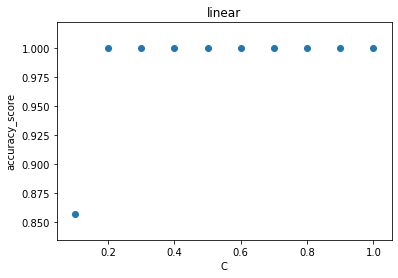

In [97]:
accuracy_list = []
for i in range(1, 11, 1): 
    c = i/10
    clf = SVC(kernel='linear', C=c)
    clf.fit(X_train_scaled, y_train_scaled)
    y_pred = clf.predict(X_test_scaled)
    accuracy_score = clf.score(X_test_scaled,y_test_scaled)
    accuracy_list.append(AccuracyData(c,accuracy_score))
    
fig, ax = plt.subplots()

plt.xlabel('C')
plt.ylabel('accuracy_score')
plt.title('linear')

ax.scatter([e.C for e in accuracy_list], [e.accuracy_score for e in accuracy_list])

plt.show()

### Dla zbioru *dataR2* proszę dokonać podobnej analizy danych. Opis zbioru: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra

## Zadanie 5

Proszę zwizualizować dane dla 2 dowolnych zmiennych ze zbioru

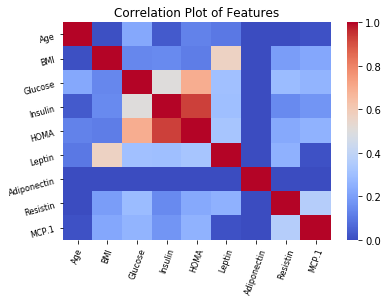

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cancer_df = pd.read_csv('./datasets/dataR2.csv')
cancer_df.head()
features = list(cancer_df.columns[0:9])
cancer_df['Classification'] = cancer_df['Classification'].map(lambda x: 1 if x == 1 else 0)

features_corr = cancer_df[features].corr()
g1 = sns.heatmap(features_corr, cmap='coolwarm', vmin=0, vmax=1)
g1.set_xticklabels(g1.get_xticklabels(), rotation=70, fontsize=8)
g1.set_yticklabels(g1.get_yticklabels(), rotation=15, fontsize=8)
plt.title("Correlation Plot of Features")
plt.savefig("Corr_Features.png", dpi=200)
plt.show()

Za pomocą metody pandas.DataFrame.corr() obliczyłam korelację pomiędzy poszczególnymi cechami. Za pomocą heatmap() łatwo jest odczytać, że największa korelacja występuje pomiędzy cechą 'HOMA' oraz 'Insulin'. Z tego powodu wybieram te dwie cechy.

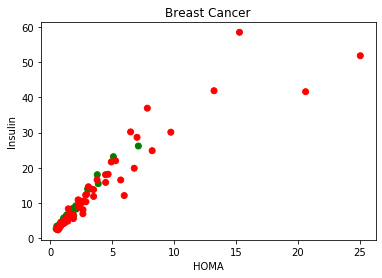

In [80]:
from matplotlib import colors

z = cancer_df['Classification']
x = cancer_df['HOMA']
y = cancer_df['Insulin']

plt.scatter(x, y, c=z, cmap=colors.ListedColormap(['red', 'green']))
plt.xlabel('HOMA')
plt.ylabel('Insulin')
plt.title('Breast Cancer')
plt.show()

## Zadanie 6

Proszę dokonać standaryzacji danych

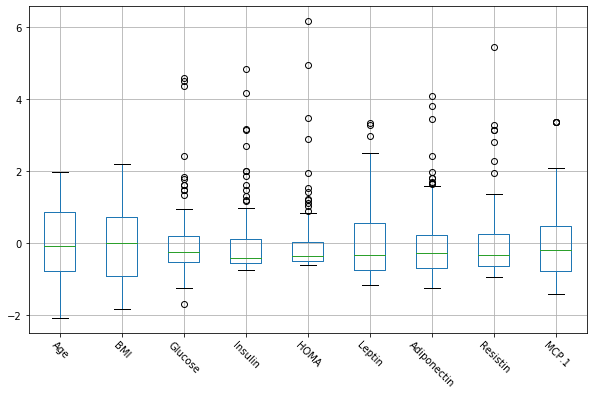

In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(cancer_df[features])
scaled_features_df = pd.DataFrame(scaled_features, index=cancer_df.index, columns=cancer_df[features].columns)
scaled_features_df.boxplot(rot=-45,figsize=(10,6))

## Zadanie 7

Trenowanie klasyfikatora. Proszę dokonać treningu klasyfikatora na zbiorze treningowym (X_train, y_train). Proszę użyć różnych wartości parametru C, gamma oraz kernel. Pełna dokumentacja klasyfikatora: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html Wyniki proszę podsumować na odpowiednim wykresie lub tabeli. Test skuteczności klasyfikatora proszę dokonać na zbiorze testowym (X_test, y_test).

In [37]:
class SVCData:
    def __init__(self,C,gamma,kernel,accuracy_score):
        self.C = C
        self.gamma = gamma
        self.kernel = kernel
        self.accuracy_score = accuracy_score

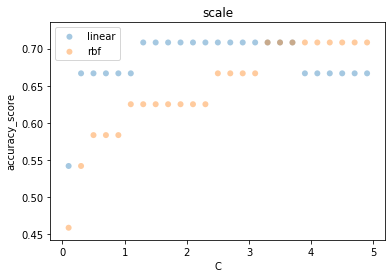

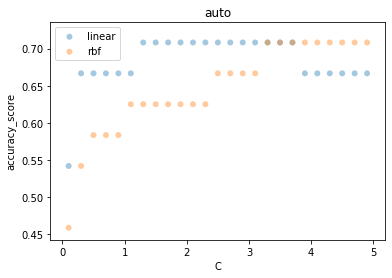

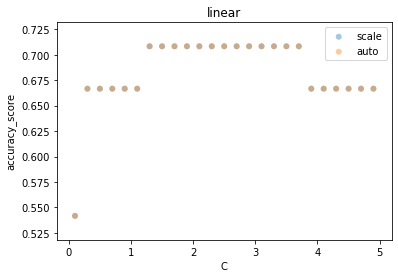

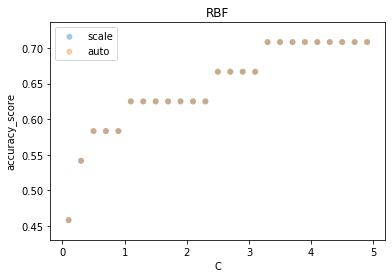

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X_train, X_test, y_train, y_test = train_test_split(scaled_features_df,cancer_df['Classification'],test_size=0.2, train_size=0.8)

linear_scale_list = []

for i in range(1,50,2):
    C=i/10
    clf = SVC(C=C, kernel='linear', gamma='scale')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy_score = clf.score(X_test,y_test)
    linear_scale_list.append(SVCData(C,'linear','scale',accuracy_score))
    
rbf_scale_list = []

for i in range(1,50,2):
    C=i/10
    clf = SVC(C=C, kernel='rbf', gamma='scale')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy_score = clf.score(X_test,y_test)
    rbf_scale_list.append(SVCData(C,'rbf','scale',accuracy_score))

    
linear_auto_list = []

for i in range(1,50,2):
    C=i/10
    clf = SVC(C=C, kernel='linear', gamma='auto')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy_score = clf.score(X_test,y_test)
    linear_auto_list.append(SVCData(C,'linear','auto',accuracy_score))
    
rbf_auto_list = []

for i in range(1,50,2):
    C=i/10
    clf = SVC(C=C, kernel='rbf', gamma='auto')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy_score = clf.score(X_test,y_test)
    rbf_auto_list.append(SVCData(C,'rbf','auto',accuracy_score))
    
    
fig, ax = plt.subplots()

plt.xlabel('C')
plt.ylabel('accuracy_score')
plt.title('scale')

ax.scatter([e.C for e in linear_scale_list], [e.accuracy_score for e in linear_scale_list], label='linear', alpha = 0.4, edgecolors='none')
ax.scatter([e.C for e in rbf_scale_list], [e.accuracy_score for e in rbf_scale_list], label='rbf', alpha = 0.4, edgecolors='none')

ax.legend()
plt.show()

figb, bx = plt.subplots()

plt.xlabel('C')
plt.ylabel('accuracy_score')
plt.title('auto')

bx.scatter([e.C for e in linear_auto_list], [e.accuracy_score for e in linear_auto_list], label='linear', alpha = 0.4, edgecolors='none')
bx.scatter([e.C for e in rbf_auto_list], [e.accuracy_score for e in rbf_auto_list], label='rbf', alpha = 0.4, edgecolors='none')

bx.legend()
plt.show()


figc, cx = plt.subplots()

plt.xlabel('C')
plt.ylabel('accuracy_score')
plt.title('linear')

cx.scatter([e.C for e in linear_scale_list], [e.accuracy_score for e in linear_scale_list], label='scale', alpha = 0.4, edgecolors='none')
cx.scatter([e.C for e in linear_auto_list], [e.accuracy_score for e in linear_auto_list], label='auto', alpha = 0.4, edgecolors='none')

cx.legend()
plt.show()

figd, dx = plt.subplots()

plt.xlabel('C')
plt.ylabel('accuracy_score')
plt.title('RBF')

dx.scatter([e.C for e in rbf_scale_list], [e.accuracy_score for e in rbf_scale_list], label='scale', alpha = 0.4, edgecolors='none')
dx.scatter([e.C for e in rbf_auto_list], [e.accuracy_score for e in rbf_auto_list], label='auto', alpha = 0.4, edgecolors='none')

dx.legend()
plt.show()

## Zadanie 8

Należy wyznaczyć macierze pomyłek dla klasyfikatora. Proszę dokonać wizualizacji wraz z kolorami na wykresie. Przykłady: 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix

https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

Confusion matrix whose i-th row and j-th column entry indicates the number of samples with true label being i-th class and prediced label being j-th class.
[[12  3]
 [ 1  8]]
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.73      0.89      0.80         9

    accuracy                           0.83        24
   macro avg       0.83      0.84      0.83        24
weighted avg       0.85      0.83      0.84        24



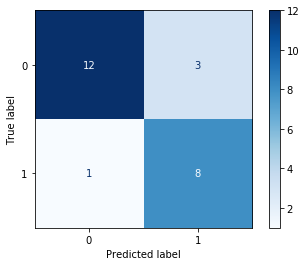

In [249]:
from sklearn.metrics import plot_confusion_matrix

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)